# Multi-layer perceptron



## Sigmoid function

![alt text](https://drive.google.com/uc?id=1TOnW5t6niK8kUCjjv9Nh-cdxmYi_it-F)

In [1]:
import numpy as np

In [2]:
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

## Input layer to hidden layer

![alt text](https://drive.google.com/uc?id=1GBajLXOuC8SgxKxf57iTrHm8Lw3MMqzz)

In [3]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

In [4]:
outputs = np.array([[0], [1], [1], [0]])

In [5]:
weights0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])

In [6]:
weights1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])

In [7]:
epochs = 100
learning_rate = 0.3

In [8]:
input_layer = inputs
print(input_layer)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [9]:
sum_synapse0 = np.dot(input_layer, weights0)
print(sum_synapse0)

[[ 0.     0.     0.   ]
 [ 0.358 -0.577 -0.469]
 [-0.424 -0.74  -0.961]
 [-0.066 -1.317 -1.43 ]]


In [10]:
hidden_layer = sigmoid(sum_synapse0)
print(hidden_layer)

[[0.5        0.5        0.5       ]
 [0.5885562  0.35962319 0.38485296]
 [0.39555998 0.32300414 0.27667802]
 [0.48350599 0.21131785 0.19309868]]


In [11]:
sum_synapse1 = np.dot(hidden_layer, weights1)
print(sum_synapse1)

[[-0.381     ]
 [-0.27419072]
 [-0.25421887]
 [-0.16834784]]


In [12]:
output_layer = sigmoid(sum_synapse1)
print(output_layer)

[[0.40588573]
 [0.43187857]
 [0.43678536]
 [0.45801216]]


![alt text](https://drive.google.com/uc?id=1tyaDx4fNdXIS9EJTcKO9hP2P03GCA0Fj)

In [13]:
error_output_layer = outputs - output_layer
print(error_output_layer)

[[-0.40588573]
 [ 0.56812143]
 [ 0.56321464]
 [-0.45801216]]


In [14]:
average = np.mean(abs(error_output_layer))
print(average)

0.49880848923713045


![alt text](https://drive.google.com/uc?id=1TS68lw8fRrZptGsOZ4iBw4fw0mh1_yH7)

In [15]:
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)
s = sigmoid(0.5)
print(s)

0.6224593312018546


In [16]:
d = sigmoid_derivative(s)
print(d)

0.2350037122015945


![alt text](https://drive.google.com/uc?id=1onElTzv80-S7b2GqzP9XXENNTxYZKtbR)

In [17]:
derivative_output = sigmoid_derivative(output_layer)
print(derivative_output)

[[0.2411425 ]
 [0.24535947]
 [0.24600391]
 [0.24823702]]


In [18]:
delta_output = error_output_layer * derivative_output
print(delta_output)

[[-0.0978763 ]
 [ 0.13939397]
 [ 0.138553  ]
 [-0.11369557]]


![alt text](https://drive.google.com/uc?id=1KwX3K5FUunqnneS3Z1zAreMmENdVfnig)

In [19]:
weights1_transposed = weights1.T
delta_output_weight = delta_output.dot(weights1_transposed)
print(delta_output_weight)

[[ 0.0016639   0.08740354 -0.01448569]
 [-0.0023697  -0.12447882  0.02063031]
 [-0.0023554  -0.12372783  0.02050584]
 [ 0.00193282  0.10153015 -0.01682694]]


In [20]:
delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
print(delta_hidden_layer)

[[ 0.00041597  0.02185088 -0.00362142]
 [-0.00057384 -0.02866677  0.00488404]
 [-0.00056316 -0.02705587  0.00410378]
 [ 0.00048268  0.01692128 -0.00262183]]


![alt text](https://drive.google.com/uc?id=15LCxQTbvGr9eNwTjgHmMbBr1oBun51yr)

In [21]:
hidden_layer_transposed = hidden_layer.T
input_delta1 = hidden_layer_transposed.dot(delta_output)
print(input_delta1)

[[0.03293657]
 [0.02191844]
 [0.02108814]]


In [22]:
weights1 = weights1 + input_delta1 * learning_rate
print(weights1)

[[-0.00711903]
 [-0.88642447]
 [ 0.15432644]]


![alt text](https://drive.google.com/uc?id=116y4hCuK1_ek8RcyW5t8t6tZLGsk_D6x)

In [23]:
input_layer_transposed = input_layer.T
input_delta0 = input_layer_transposed.dot(delta_hidden_layer)
print(input_delta0)

[[-8.04778516e-05 -1.01345901e-02  1.48194623e-03]
 [-9.11603819e-05 -1.17454886e-02  2.26221011e-03]]


In [24]:
weights0 = weights0 + input_delta0 * learning_rate
print(weights0)

[[-0.42402414 -0.74304038 -0.96055542]
 [ 0.35797265 -0.58052365 -0.46832134]]


## Complete neural network

In [25]:
import numpy as np

def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

outputs = np.array([[0], [1], [1], [0]])

In [26]:
weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

In [27]:
epochs = 1000000
learning_rate = 0.3
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  if epoch % 100000 == 0:
    print('Epoch:', (epoch + 1), 'Error:', average)
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1_transposed = weights1.T
  delta_output_weight = delta_output.dot(weights1_transposed)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layer_transposed = hidden_layer.T
  input_x_delta1 = hidden_layer_transposed.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layer_transposed = input_layer.T
  input_x_delta0 = input_layer_transposed.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.4998762342803168
Epoch: 100001 Error: 0.010917621268078093
Epoch: 200001 Error: 0.007608719223313631
Epoch: 300001 Error: 0.006172881848631469
Epoch: 400001 Error: 0.005325243443639856
Epoch: 500001 Error: 0.004750273692351117
Epoch: 600001 Error: 0.004327651041136937
Epoch: 700001 Error: 0.004000244925869426
Epoch: 800001 Error: 0.0037370039770151225
Epoch: 900001 Error: 0.003519414444492867


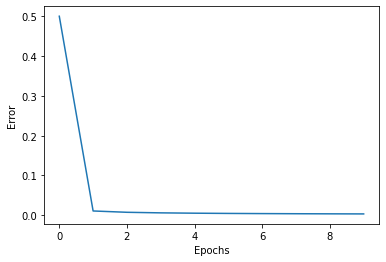

In [28]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)

In [29]:
print(outputs)

[[0]
 [1]
 [1]
 [0]]


In [30]:
print(output_layer)

[[5.74282299e-03]
 [9.96560110e-01]
 [9.96559905e-01]
 [7.19857709e-04]]


In [31]:
print(weights0)

[[-4.87994439  6.20721035  7.16342266]
 [ 7.11543093  6.19078526 -4.89626396]]


In [32]:
print(weights1)

[[-16.13018352]
 [ 21.95048335]
 [-16.12839084]]


In [33]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [34]:
round(calculate_output(np.array([0, 0])))

0

In [35]:
round(calculate_output(np.array([0, 1])))

1

In [36]:
round(calculate_output(np.array([1, 0])))

1

In [37]:
round(calculate_output(np.array([1, 1])))

0